# ADS Homework #7: Network Analysis
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, December 17, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu.

In [65]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
from scipy.stats import lognorm
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
import collections

Populating the interactive namespace from numpy and matplotlib


In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('lesmis.gml')

In [3]:
values = dict(G.degree())
size = np.array(list(values.values())) ** 2 * 100
size

array([  4900,   3600,    400,    400,  16900,    100,    400,  12100,
          400,    100,   4900,   8100,    100,  12100,    100,    100,
        10000,  12100,    100,   4900,  12100,    400,    100,  10000,
          900,    900,    100,   3600,   4900,   4900,   3600,  28900,
          100,  22500,    100,    100,    400,    100,    100,   4900,
          100,    400,   4900,   4900,  10000,  22500,   1600,    100,
         4900,  25600,   1600,  14400,    900,  10000,   8100,  12100,
        36100, 129600,  14400,    900,  12100,   3600,  48400,   1600,
         3600,    900,   6400,   4900,  16900,    100,  10000,    400,
          400,    400,   8100,    900,    100])

## Problem 1 (20% of credit) 
Visualize the network with node labes and sizes proportional to node degree

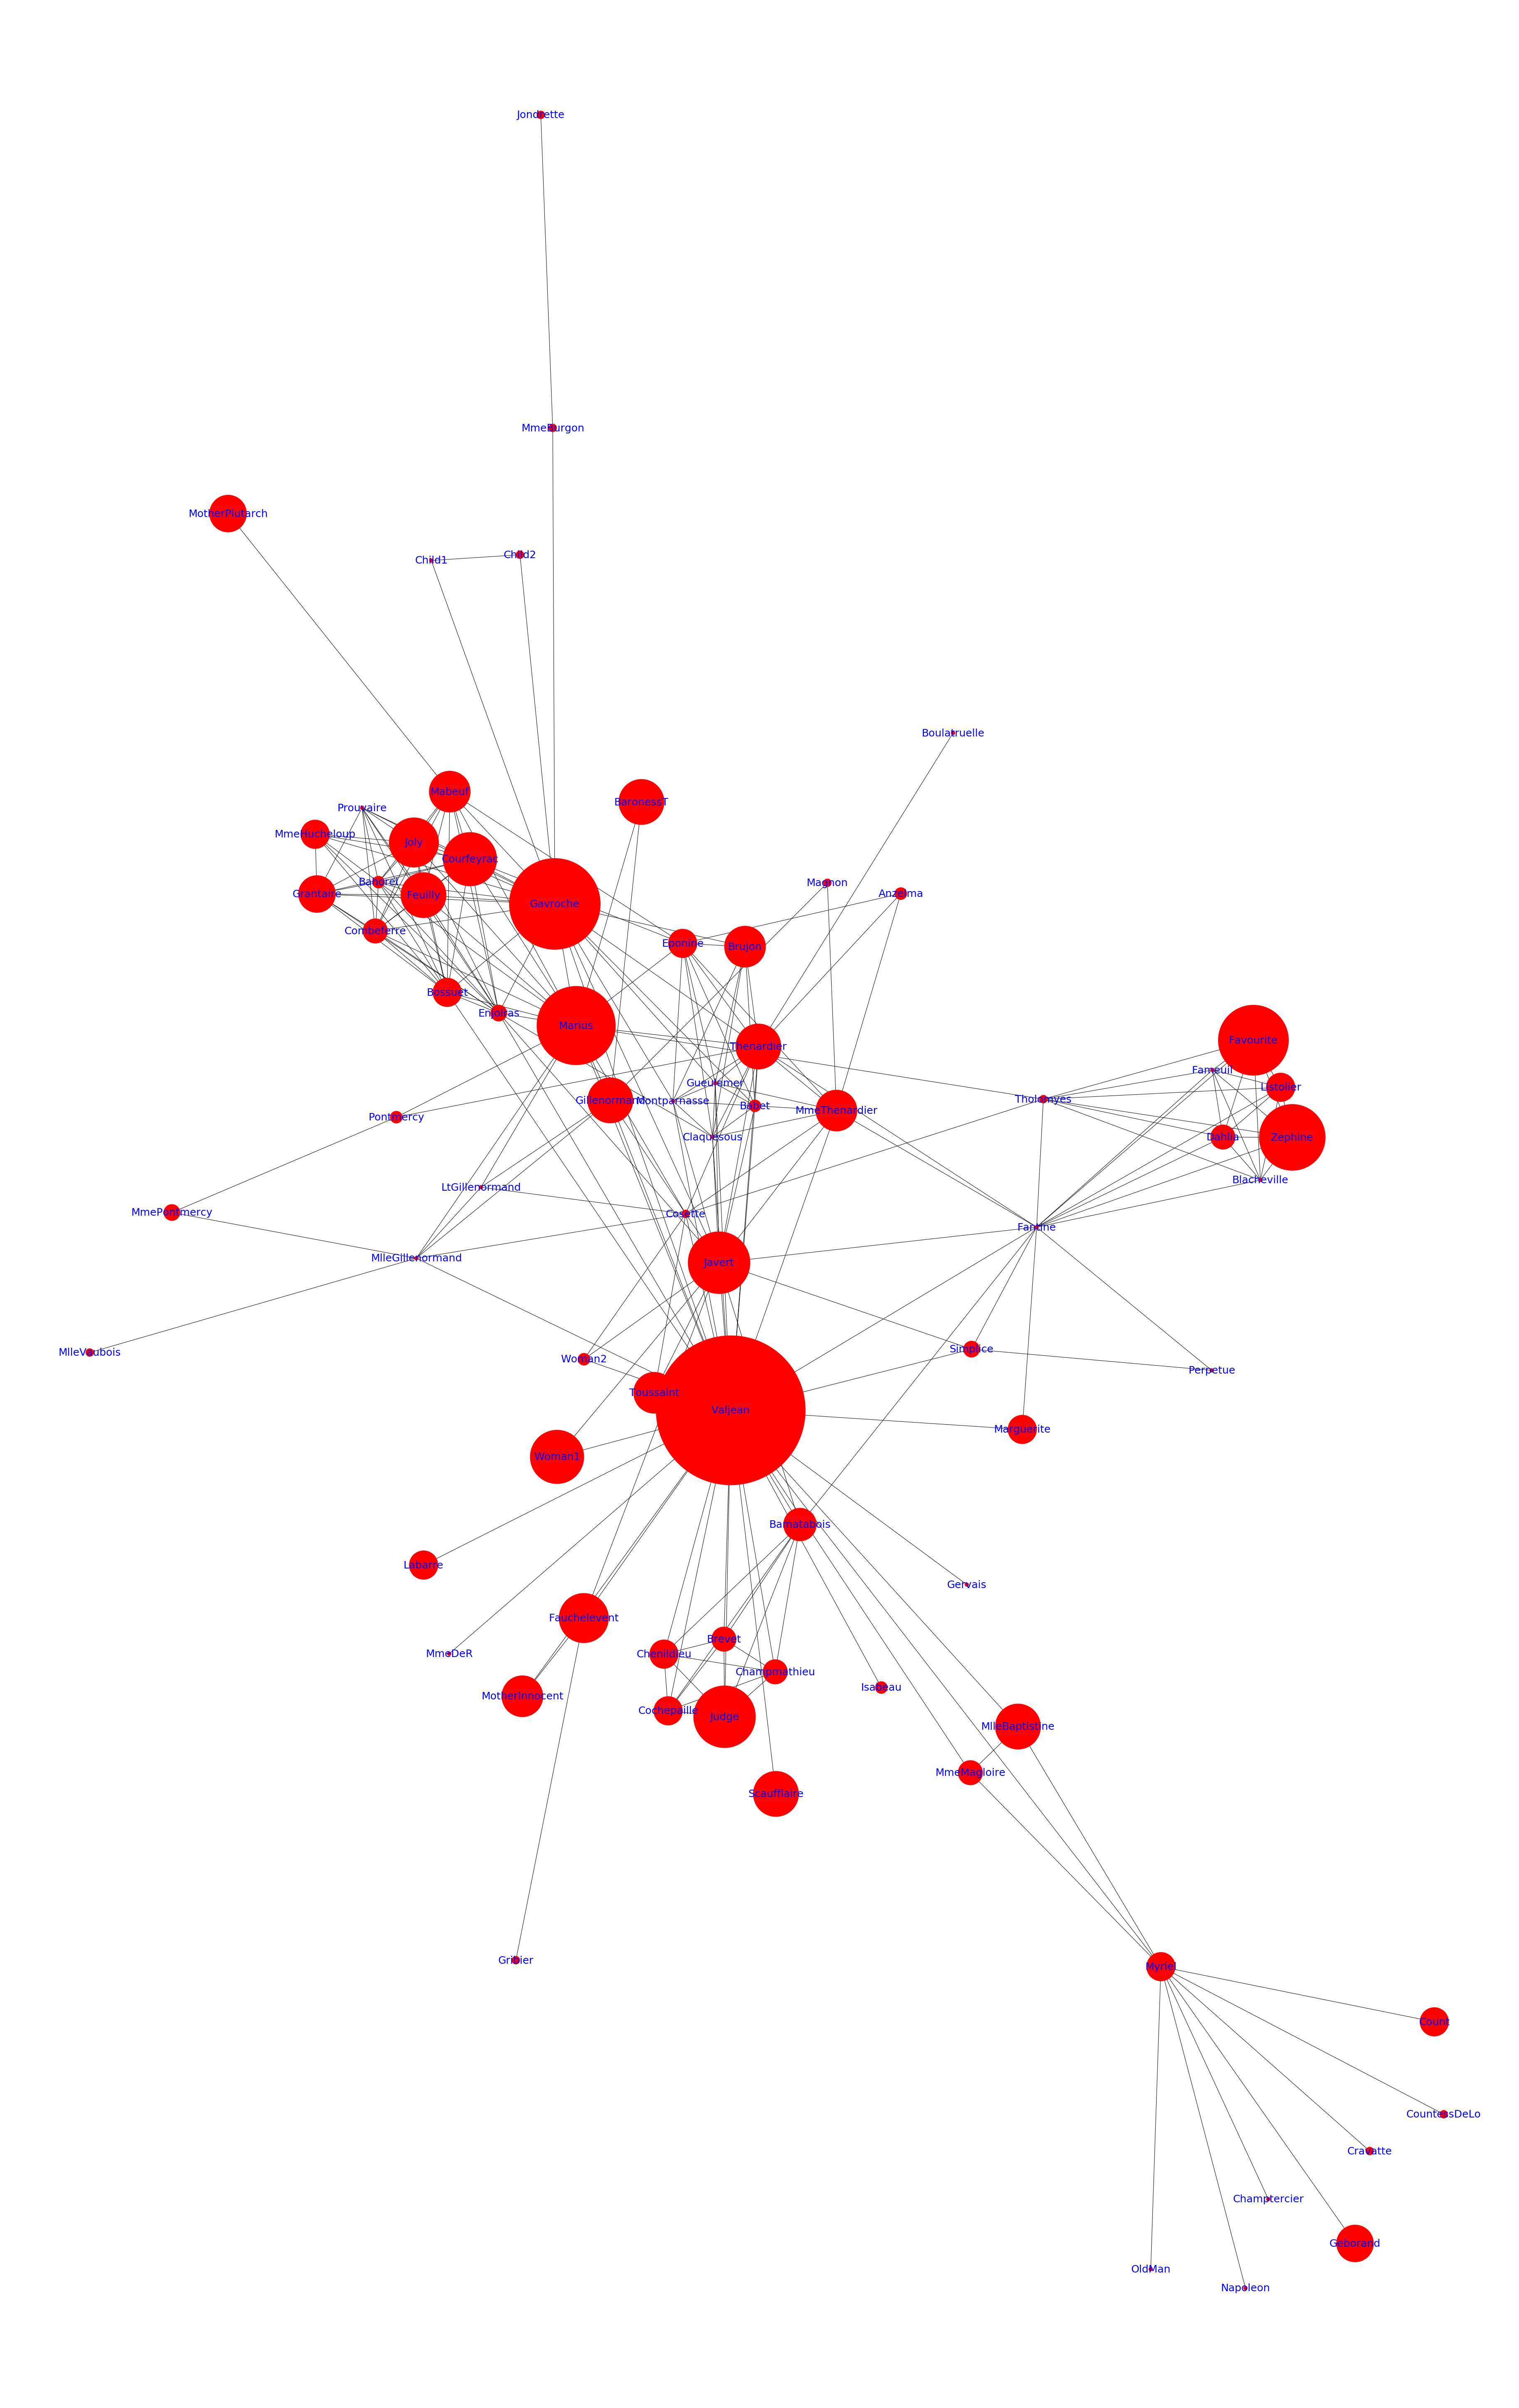

In [4]:
np.random.seed(2018)
plt.figure(figsize(50,80))
nx.draw(G,with_labels=True, node_size=size, linewidths=0.1, font_color='b', font_size=25)

## Problem 2 (30% of credit)
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality

In [28]:
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1} - {2} '.format(i+1,ind[i],d[ind[i]]))
    return ind

In [32]:
ind1=topdict(values, 5)

1|Valjean - 36 
2|Gavroche - 22 
3|Marius - 19 
4|Javert - 17 
5|Thenardier - 16 


b) eigenvector centrality

In [33]:
mc2=nx.eigenvector_centrality(G)
ind2=topdict(mc2,5)

1|Gavroche - 0.3178389397749769 
2|Valjean - 0.2676181759885393 
3|Enjolras - 0.26717863282356663 
4|Marius - 0.2591111453417876 
5|Bossuet - 0.2421307863747414 


c) betweenness centrality

In [34]:
mc3=nx.betweenness_centrality(G)
ind3=topdict(mc3,5)

1|Valjean - 0.5699890527836187 
2|Myriel - 0.17684210526315788 
3|Gavroche - 0.16511250242584763 
4|Marius - 0.13203248862194603 
5|Fantine - 0.12964454098819425 


d) closeness centrality

In [36]:
mc4=nx.closeness_centrality(G)
ind4=topdict(mc4,5)

1|Valjean - 0.6440677966101694 
2|Marius - 0.5314685314685315 
3|Javert - 0.5170068027210885 
4|Thenardier - 0.5170068027210885 
5|Gavroche - 0.5135135135135135 


## Problem 3 (25% of credit)
Analyze the impact of damping parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

So for the values of damping parameter between 0.4 and 0.95 top five nodes are the same, just the order is varied slightly (exactly the same between 0.7 and 0.85). For the values $\alpha=0.1-0.3$ node 55 is replaced with the node 25 in the top 5 list

In [42]:
mc5=nx.pagerank(G, 0.95)
ind5=topdict(mc5,5)

1|Valjean - 0.0747043161907721 
2|Gavroche - 0.03955288718377237 
3|Marius - 0.03430243839798215 
4|Myriel - 0.033460628812939514 
5|Javert - 0.03239593175267779 


In [43]:
mc6=nx.pagerank(G, 0.9)
ind6=topdict(mc6,5)

1|Valjean - 0.07570137903943516 
2|Myriel - 0.03965531861134029 
3|Gavroche - 0.03739018829226064 
4|Marius - 0.03238365765284897 
5|Javert - 0.03134631873222991 


In [44]:
mc7=nx.pagerank(G, 0.85)
ind7=topdict(mc7,5)

1|Valjean - 0.07543374445332475 
2|Myriel - 0.042803439760757324 
3|Gavroche - 0.03576412343161933 
4|Marius - 0.03089270192040647 
5|Javert - 0.030302597127170365 


In [45]:
mc8=nx.pagerank(G, 0.8)
ind8=topdict(mc8,5)

1|Valjean - 0.07442184631334864 
2|Myriel - 0.044341102585905595 
3|Gavroche - 0.03435748592585355 
4|Marius - 0.02959764323346689 
5|Javert - 0.029264062175007443 


In [46]:
mc9=nx.pagerank(G, 0.7)
ind9=topdict(mc9,5)

1|Valjean - 0.0709527717328387 
2|Myriel - 0.04489784761133811 
3|Gavroche - 0.03176794006501972 
4|Marius - 0.027267015891693086 
5|Javert - 0.02720525409804276 


In [47]:
mc10=nx.pagerank(G, 0.6)
ind10=topdict(mc10,5)

1|Valjean - 0.06608136478461615 
2|Myriel - 0.04355003256779984 
3|Gavroche - 0.029232503859907714 
4|Javert - 0.02517268035955332 
5|Marius - 0.025087179050072312 


In [48]:
mc11=nx.pagerank(G, 0.5)
ind11=topdict(mc11,5)

1|Valjean - 0.060054818715401706 
2|Myriel - 0.04097024120161402 
3|Gavroche - 0.02665831656391426 
4|Javert - 0.023162138282418525 
5|Marius - 0.02297520755284887 


In [49]:
mc12=nx.pagerank(G, 0.4)
ind12=topdict(mc12,5)

1|Valjean - 0.0529448267787378 
2|Myriel - 0.03742525493100432 
3|Gavroche - 0.024023892885771354 
4|Javert - 0.021163905231402706 
5|Marius - 0.020905025746071018 


In [50]:
mc13=nx.pagerank(G, 0.3)
ind13=topdict(mc13,5)

1|Valjean - 0.04474921315308957 
2|Myriel - 0.03295546624663094 
3|Gavroche - 0.021329496596520194 
4|Javert - 0.01916488385308706 
5|Thenardier - 0.019058776576435447 


In [51]:
mc14=nx.pagerank(G, 0.2)
ind14=topdict(mc14,5)

1|Valjean - 0.03541949380202515 
2|Myriel - 0.027495120006737393 
3|Gavroche - 0.018583426528045167 
4|Thenardier - 0.01718586542614887 
5|Javert - 0.01714898428962244 


In [52]:
mc15=nx.pagerank(G, 0.1)
ind15=topdict(mc15,5)

1|Valjean - 0.02487047109487632 
2|Myriel - 0.02091042373530604 
3|Gavroche - 0.01579776348483299 
4|Thenardier - 0.015167220377215374 
5|Javert - 0.01509708728536251 


The top five nodes stays the same for different values of α(0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4). The only difference is the order of the top five nodes. For different values of α(0.3, 0.2, 0.1), the node Marius is replaced by the node Thenardier. 

## Problem 4 (25% of credit) 
Analyze the degree distribution - visualize it and try to fit with a log-normal distribution.

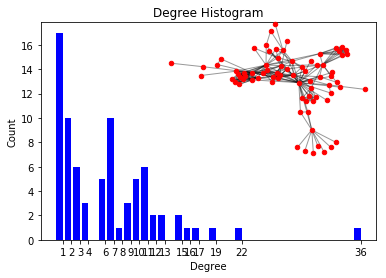

In [69]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()